# Logistic Regression Assignment
---

**GOAL: Create a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)**

You will work with the [heart.csv](../Data/heart.csv) file which contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Data dictionary:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

## Q1: Imports and Data Loading

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV 
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_recall_curve, roc_curve, auc, RocCurveDisplay, PrecisionRecallDisplay

In [5]:
# Load data
df = pd.read_csv('heart.csv')

## Q2: EDA

Explore if the dataset has any missing data points and create a statistical summary of the numerical features.

Feel free to explore the data further on your own.

In [7]:
# EDA

# Check for missing data
missing_data = df.isnull().sum()
print("Missing data in each column:\n", missing_data)

# Statistical summary of the numerical features
stat_summary = df.describe()
print("Statistical summary of numerical features:\n", stat_summary)

Missing data in each column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Statistical summary of numerical features:
               age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    

In [8]:
# Statistical summary of the numerical features
stat_info = df.info()
print("Statistical summary of numerical features:\n", stat_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
Statistical summary of numerical features:
 None


In [9]:
# Implications

# No missing values, no need to do imputation
# Some features are categorical (like sex, cp, fbs)
# Some features are continue (like age, trestbps, chol)

## Q3: Visualization 
1. Create a bar plot that shows the total counts per target value.
2. Create a pairplot that displays the relationships between the following columns:

    ['age','trestbps', 'chol','thalach','target']
   
*Note: Running a pairplot on everything can take a very long time due to the number of features*

3. Create a heatmap that displays the correlation between all the columns.

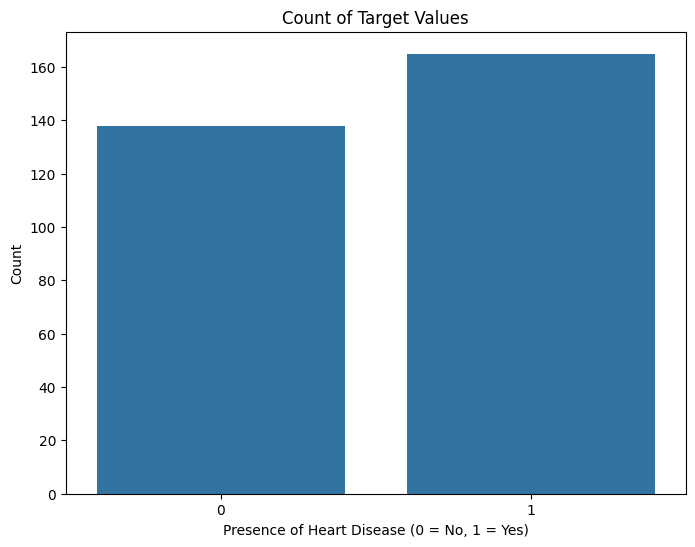

In [11]:
# 1. Create a bar plot that shows the total counts per target value.

plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.xlabel('Presence of Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

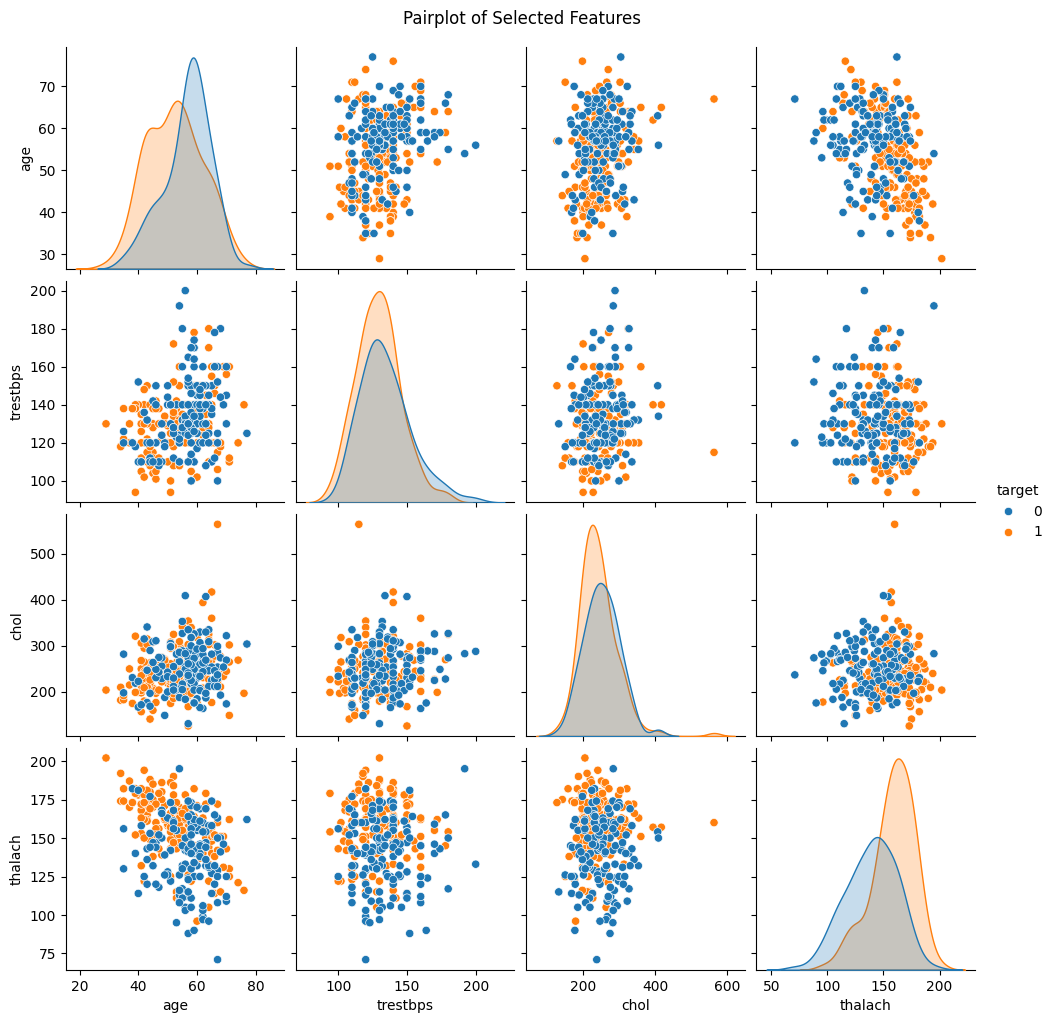

In [12]:
# 2. Create a pairplot that displays the relationships

# Running pairplot on everything will take a very long time to render!
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'target']
sns.pairplot(df[selected_features], hue='target', diag_kind='kde')
plt.show()

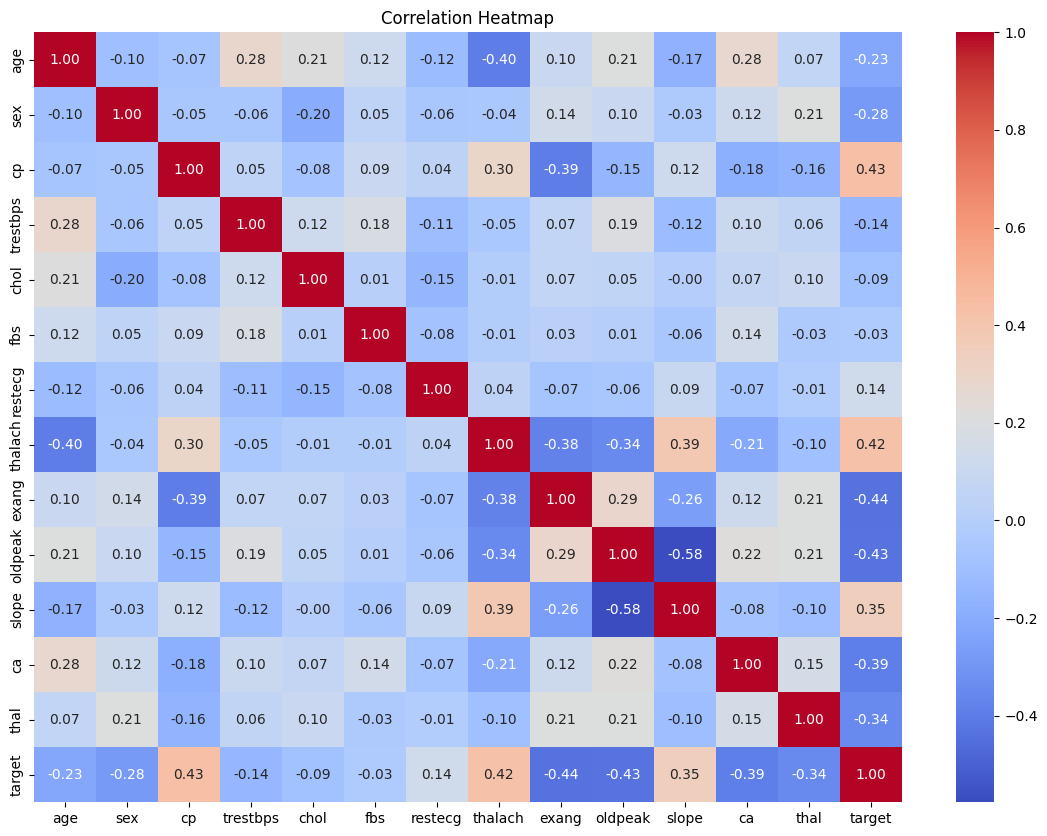

In [13]:
# 3. Create a heatmap that displays the correlation between all the columns.

plt.figure(figsize=(14, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

## Q4: Prepare Data for Analysis
1. Separate the features from the labels into 2 objects, X and y.
2. Split the data into training-testing data
3. Create a StandardScaler object and normalize the X train and test set feature data. Make sure you only fit to the training data to avoid data leakage (data knowledge leaking from the test set)

In [15]:
# 1. Separate the features from the labels into 2 objects, X and y.

X = df.drop('target', axis=1)
y = df['target']

In [16]:
# 2. Split the data into training-testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [17]:
# 3. Create a StandardScaler object and normalize the X train and test set feature data

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Q5: Logistic Regression Model

1. Create a Logistic Regression model and use Cross-Validation to find a well-performing C value for the hyper-parameter search. You have two options here, use *LogisticRegressionCV* OR use a combination of *LogisticRegression* and *GridSearchCV*. The choice is up to you.
2. Report back your search's optimal parameters, specifically the C value.
3. Report back the model's coefficients.
4. Bonus: Create a visualization of the coefficients by using a barplot of their values.

In [19]:
# 1. Create a Logistic Regression model and use Cross-Validation 
log_model_cv = LogisticRegressionCV(cv=10, max_iter=10000)

In [20]:
# 2. Report back your search's optimal parameters
log_model_cv.fit(scaled_X_train, y_train)

LogisticRegressionCV(cv=10, max_iter=10000)

In [21]:
# Obtain C value
optimal_C = log_model_cv.C_[0]
print(f'Optimal C value: {optimal_C}')

Optimal C value: 0.046415888336127774


In [22]:
# 3. Report back the model's coefficients.

coefficients = log_model_cv.coef_[0]

# Create a dataframe for the coefficients
feature_names = X.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Display the coefficients dataframe
print(coef_df)

     Feature  Coefficient
0        age    -0.123325
1        sex    -0.354807
2         cp     0.504575
3   trestbps    -0.170795
4       chol    -0.101029
5        fbs     0.082161
6    restecg     0.117517
7    thalach     0.274623
8      exang    -0.341366
9    oldpeak    -0.344731
10     slope     0.275758
11        ca    -0.428173
12      thal    -0.311880


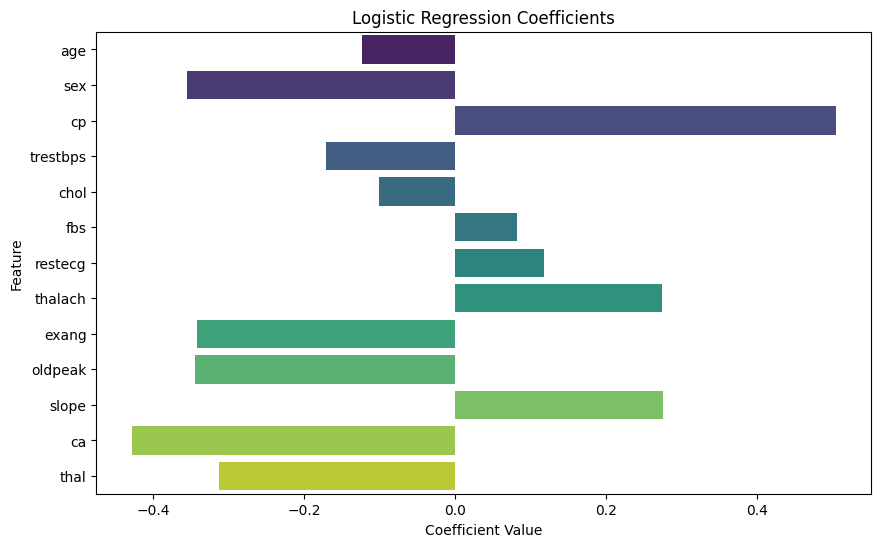

In [23]:
# 4. Create a visualization of the coefficients by using a barplot of their values.

# Plot the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis', hue='Feature', dodge=False)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.legend([], [], frameon=False)  # Remove the legend
plt.show()

## Q6: Model Evaluation

1. Create the following evaluations:
    * Confusion Matrix Array
    * Confusion Matrix Plot
    * Classification Report
2. Create both the precision-recall curve and the ROC Curve.

In [25]:
# 1. Confusion Matrix Array

y_pred = log_model_cv.predict(scaled_X_test)
y_prob = log_model_cv.predict_proba(scaled_X_test)[:, 1]

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Confusion Matrix Array:
 [[26 11]
 [ 3 36]]


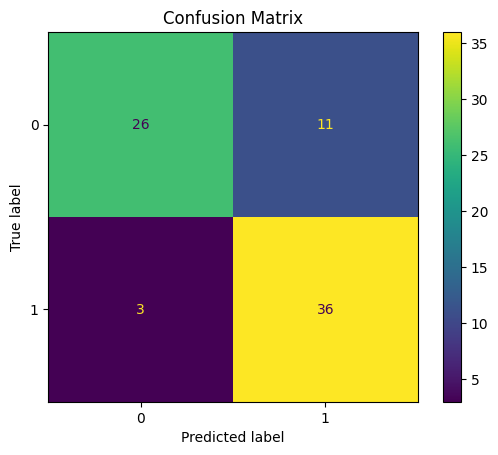

In [26]:
# Confusion Matrix Plot
ConfusionMatrixDisplay(conf_matrix, display_labels=log_model_cv.classes_).plot()
plt.show()

In [27]:
# Classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.70      0.79        37
           1       0.77      0.92      0.84        39

    accuracy                           0.82        76
   macro avg       0.83      0.81      0.81        76
weighted avg       0.83      0.82      0.81        76



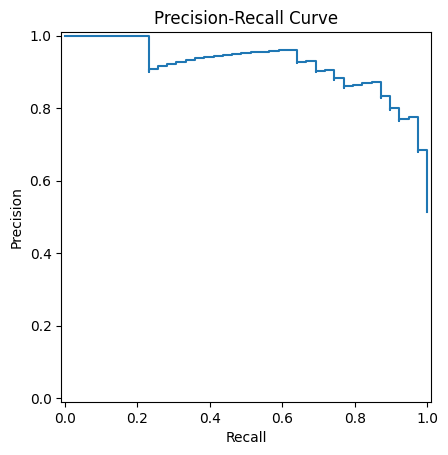

In [28]:
# 2. Create both the precision-recall curve and the ROC Curve

precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall)
pr_display.plot()
plt.title("Precision-Recall Curve")
plt.show()

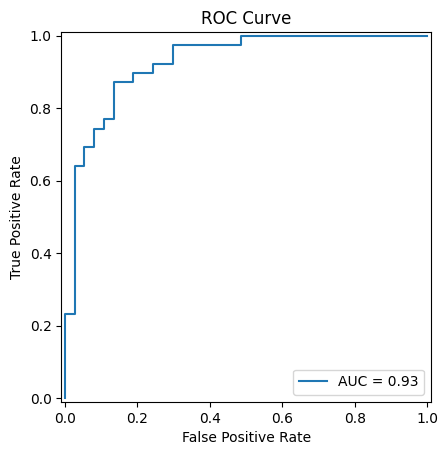

In [29]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc(fpr, tpr))
roc_display.plot()
plt.title("ROC Curve")
plt.show()

## Q7: Make Prediction

A patient with the following features has come into the medical office:

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0
    
What does your model predict for this patient? Do they have heart disease? How "sure" is your model of this prediction?

In [31]:
# Define the column names that match the training data
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [32]:
# Patient info in array format
patient_df = pd.DataFrame(data=[[54., 1., 0., 122., 286., 0., 0., 116., 1., 3.2, 1., 2., 2.]], columns=columns)

In [33]:
# Answer here
# Scale the patient data using the same scaler as for training data
scaled_patient = scaler.transform(patient_df)

# Predict the outcome using the trained Logistic Regression model
prediction = log_model_cv.predict(scaled_patient)
prediction_prob = log_model_cv.predict_proba(scaled_patient)

# Display the results
print(f"Prediction (0: no heart disease, 1: heart disease): {prediction[0]}")
print(f"Probability of having heart disease: {prediction_prob[0][1]:.4f}")
print(f"Probability of not having heart disease: {prediction_prob[0][0]:.4f}")

Prediction (0: no heart disease, 1: heart disease): 0
Probability of having heart disease: 0.0635
Probability of not having heart disease: 0.9365


In [ ]:
# Prediction Summary

# Prediction 0 (No heart disease) suggests this patient is predicted not to have heart disease.
# Probability of having heart disease is about 6.35%
# Probability of not having heart disease is about 93.65%

## Great Job!